In [6]:
# Cell 1: Setup and Imports
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Check if we're in notebooks directory
if 'notebooks' in str(Path.cwd()):
    PROJECT_ROOT = Path.cwd().parent
else:
    PROJECT_ROOT = Path.cwd()

sys.path.insert(0, str(PROJECT_ROOT / 'src'))

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful")
print(f"Project root: {PROJECT_ROOT}")
print(f"Python executable: {sys.executable}")


✓ Imports successful
Project root: d:\Dev\Projects\qrucible
Python executable: d:\Dev\Envs\qrucible_env_py312\Scripts\python.exe


In [3]:
pip list

Package                   Version
------------------------- --------------
aiofiles                  24.1.0
altair                    5.5.0
annotated-types           0.7.0
anyio                     4.11.0
appdirs                   1.4.4
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.4.0
autograd                  1.8.0
autoray                   0.7.2
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.2.0
blinker                   1.9.0
Brotli                    1.1.0
cachetools                6.2.0
cattrs                    25.3.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.3
chembl-webresource-client 0.10.9
cirq-core                 1.6.1
click                     8.3.0
cloudpickle               3.1.1
colorama        

In [7]:
# Cell 2: Load Data
data_file = PROJECT_ROOT / 'data' / 'processed' / 'chembl_egfr_kinase_clean.csv'

if not data_file.exists():
    print(f"❌ Data file not found: {data_file}")
    print("\nPlease run: python scripts/run_preprocessing.py")
else:
    df = pd.read_csv(data_file)
    print(f"✓ Loaded {len(df)} compounds")
    print(f"✓ Features: {len(df.columns)}")

✓ Loaded 9224 compounds
✓ Features: 17


In [10]:
# Cell 3: Dataset Overview
print("="*70)
print("DATASET OVERVIEW")
print("="*70)

print(f"\nShape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
df.head()

DATASET OVERVIEW

Shape: (9224, 17)
Columns: ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'standard_units', 'standard_type', 'pchembl_value', 'assay_chembl_id', 'document_chembl_id', 'pIC50', 'n_heavy_atoms', 'mol_weight', 'logp', 'tpsa', 'num_h_donors', 'num_h_acceptors', 'num_rotatable_bonds', 'lipinski_violations']


,molecule_chembl_id,canonical_smiles,standard_value,standard_units,standard_type,pchembl_value,assay_chembl_id,document_chembl_id,pIC50,n_heavy_atoms,mol_weight,logp,tpsa,num_h_donors,num_h_acceptors,num_rotatable_bonds,lipinski_violations
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,nM,IC50,7.39,CHEMBL674637,CHEMBL1134862,7.39,27,383.814,4.45034,82.70,3,4,3,0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,nM,IC50,6.77,CHEMBL674637,CHEMBL1134862,6.77,34,482.903,3.61432,112.24,3,6,4,0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,nM,IC50,5.03,CHEMBL677833,CHEMBL1145114,5.03,28,369.432,4.77200,78.66,1,6,6,0
3,CHEMBL443268,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)N(C)c2...,5310.0,nM,IC50,5.28,CHEMBL674637,CHEMBL1134862,5.28,38,539.999,3.22822,115.48,3,7,7,1
4,CHEMBL76589,N#CC(C#N)=C(N)/C(C#N)=C/c1ccc(O)cc1,125.0,nM,IC50,6.90,CHEMBL674643,CHEMBL1124610,6.90,18,236.234,1.55914,117.62,2,5,2,0


In [11]:
# Cell 4: Basic Statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,standard_value,pchembl_value,pIC50,n_heavy_atoms,mol_weight,logp,tpsa,num_h_donors,num_h_acceptors,num_rotatable_bonds,lipinski_violations
count,9.224000e+03,9213.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000
mean,9.154191e+02,7.194417,7.198544,33.865785,480.005499,4.607592,94.808384,2.199046,7.067433,6.881505,0.845512
std,1.956104e+03,1.211150,1.219974,7.155207,99.399740,1.348661,25.932768,1.127584,1.969739,2.725377,0.858456
min,5.012000e-09,5.000000,5.000000,9.000000,126.111000,-0.606420,3.880000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+00,6.240000,6.240000,29.000000,410.382250,3.728650,77.590000,1.000000,6.000000,5.000000,0.000000
50%,5.600000e+01,7.250000,7.250000,34.000000,484.864500,4.560240,96.450000,2.000000,7.000000,7.000000,1.000000
75%,5.712500e+02,8.150000,8.150000,39.000000,554.007750,5.480150,110.930000,3.000000,9.000000,9.000000,2.000000
max,1.012000e+04,11.000000,17.299989,50.000000,942.250000,10.129300,241.350000,8.000000,16.000000,23.000000,4.000000


In [12]:
# Cell 5: Missing Values
print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing'] > 0])

if missing_df['Missing'].sum() == 0:
    print("✓ No missing values!")


Missing Values:
               Missing  Percentage
pchembl_value       11        0.12


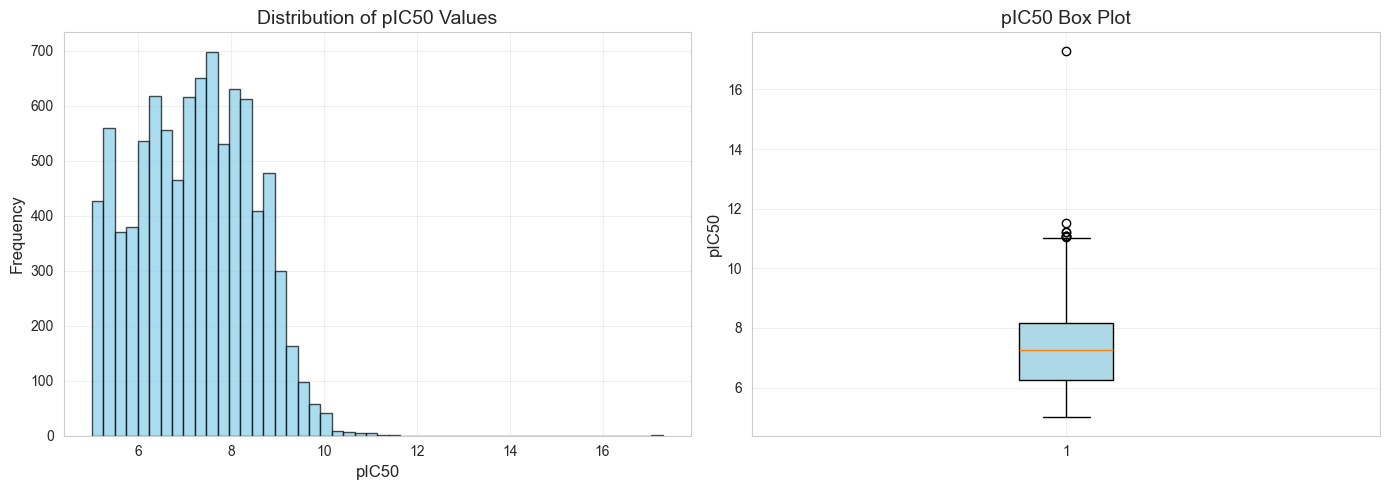


pIC50 Statistics:
count    9224.000000
mean        7.198544
std         1.219974
min         5.000000
25%         6.240000
50%         7.250000
75%         8.150000
max        17.299989
Name: pIC50, dtype: float64

Skewness: 0.116
Kurtosis: -0.306


In [13]:
# Cell 6: Activity Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['pIC50'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('pIC50', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of pIC50 Values', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Box plot
bp = axes[1].boxplot(df['pIC50'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[1].set_ylabel('pIC50', fontsize=12)
axes[1].set_title('pIC50 Box Plot', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\npIC50 Statistics:")
print(df['pIC50'].describe())
print(f"\nSkewness: {df['pIC50'].skew():.3f}")
print(f"Kurtosis: {df['pIC50'].kurtosis():.3f}")


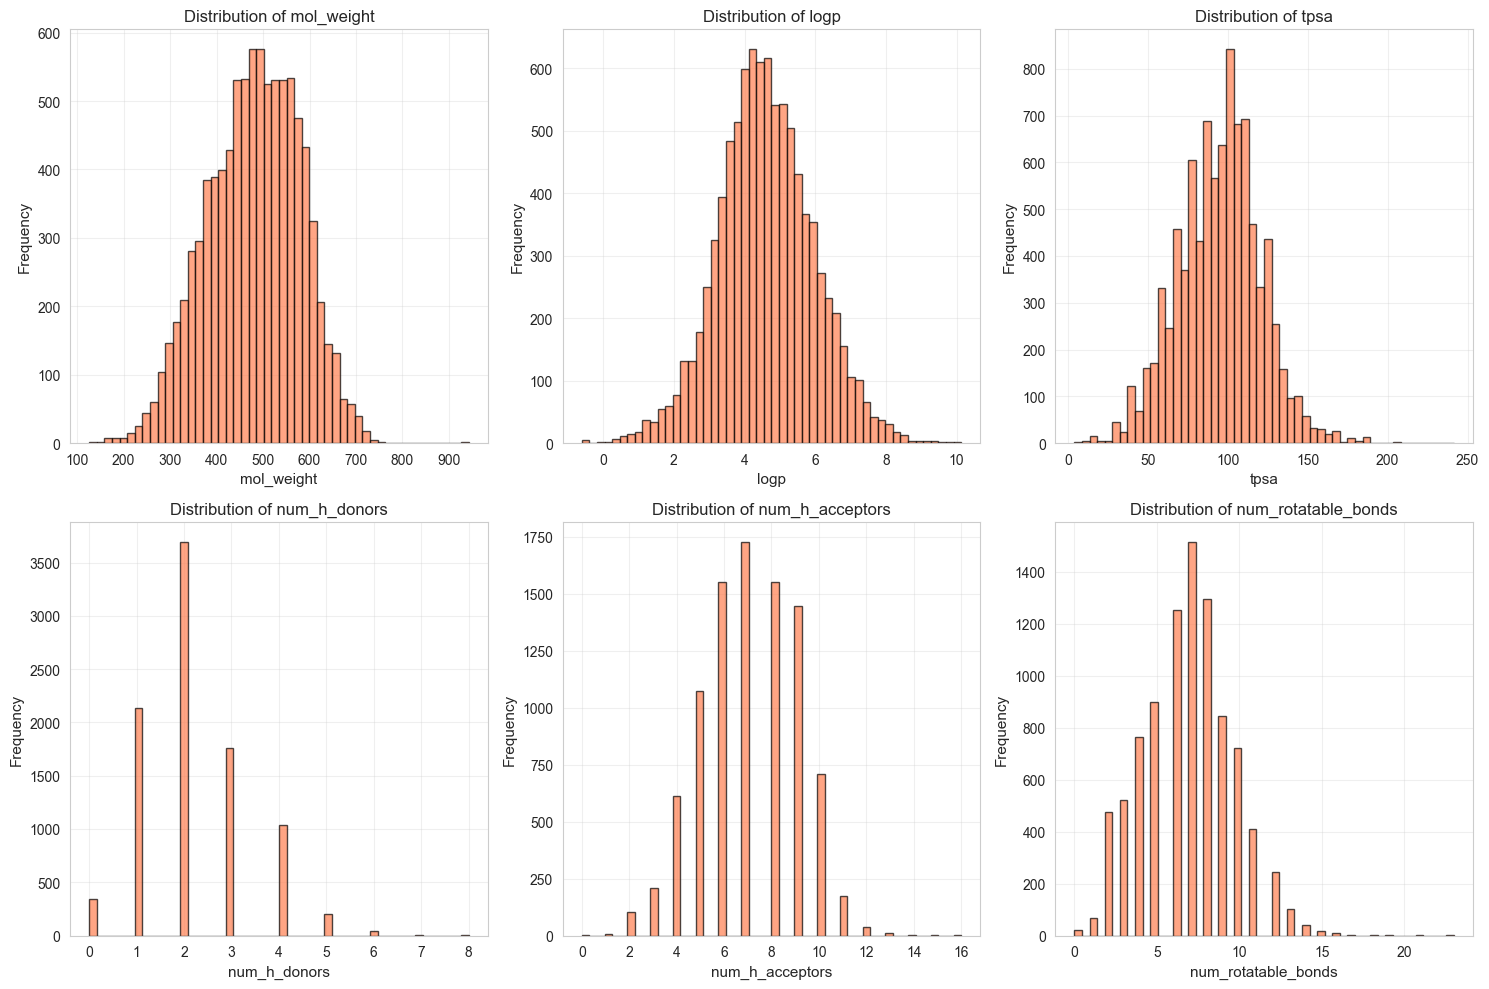

In [14]:
# Cell 7: Molecular Property Distributions
properties = ['mol_weight', 'logp', 'tpsa', 'num_h_donors', 
              'num_h_acceptors', 'num_rotatable_bonds']

# Check which properties exist
available_props = [p for p in properties if p in df.columns]

if available_props:
    n_props = len(available_props)
    n_cols = 3
    n_rows = (n_props + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, prop in enumerate(available_props):
        axes[i].hist(df[prop], bins=50, edgecolor='black', alpha=0.7, color='coral')
        axes[i].set_xlabel(prop, fontsize=11)
        axes[i].set_ylabel('Frequency', fontsize=11)
        axes[i].set_title(f'Distribution of {prop}', fontsize=12)
        axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(available_props), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No molecular properties found in dataset")


LIPINSKI'S RULE OF FIVE ANALYSIS

Violation Distribution:
lipinski_violations
0    4105
1    2552
2    2457
3     107
4       3
Name: count, dtype: int64


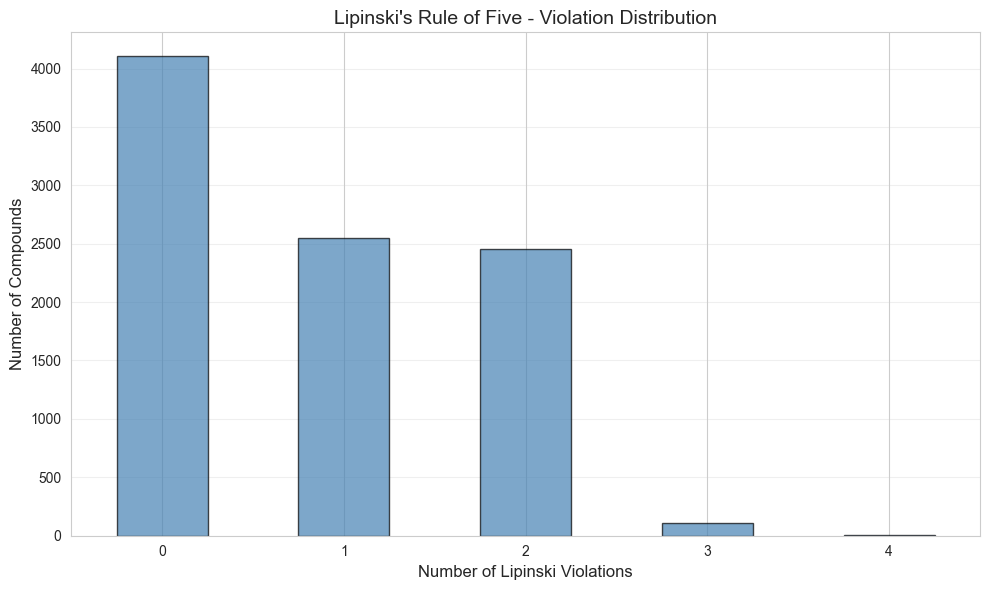


💊 Drug-like compounds (≤1 violation): 6,657 (72.2%)
💊 Non-drug-like (>1 violation): 2,567 (27.8%)


In [15]:
# Cell 8: Lipinski's Rule of Five Analysis
if 'lipinski_violations' in df.columns:
    print("="*70)
    print("LIPINSKI'S RULE OF FIVE ANALYSIS")
    print("="*70)
    
    violation_counts = df['lipinski_violations'].value_counts().sort_index()
    print("\nViolation Distribution:")
    print(violation_counts)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    violation_counts.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Number of Lipinski Violations', fontsize=12)
    plt.ylabel('Number of Compounds', fontsize=12)
    plt.title("Lipinski's Rule of Five - Violation Distribution", fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Drug-likeness percentage
    drug_like = (df['lipinski_violations'] <= 1).sum()
    drug_like_pct = drug_like / len(df) * 100
    print(f"\n💊 Drug-like compounds (≤1 violation): {drug_like:,} ({drug_like_pct:.1f}%)")
    print(f"💊 Non-drug-like (>1 violation): {len(df) - drug_like:,} ({100-drug_like_pct:.1f}%)")



CORRELATION ANALYSIS


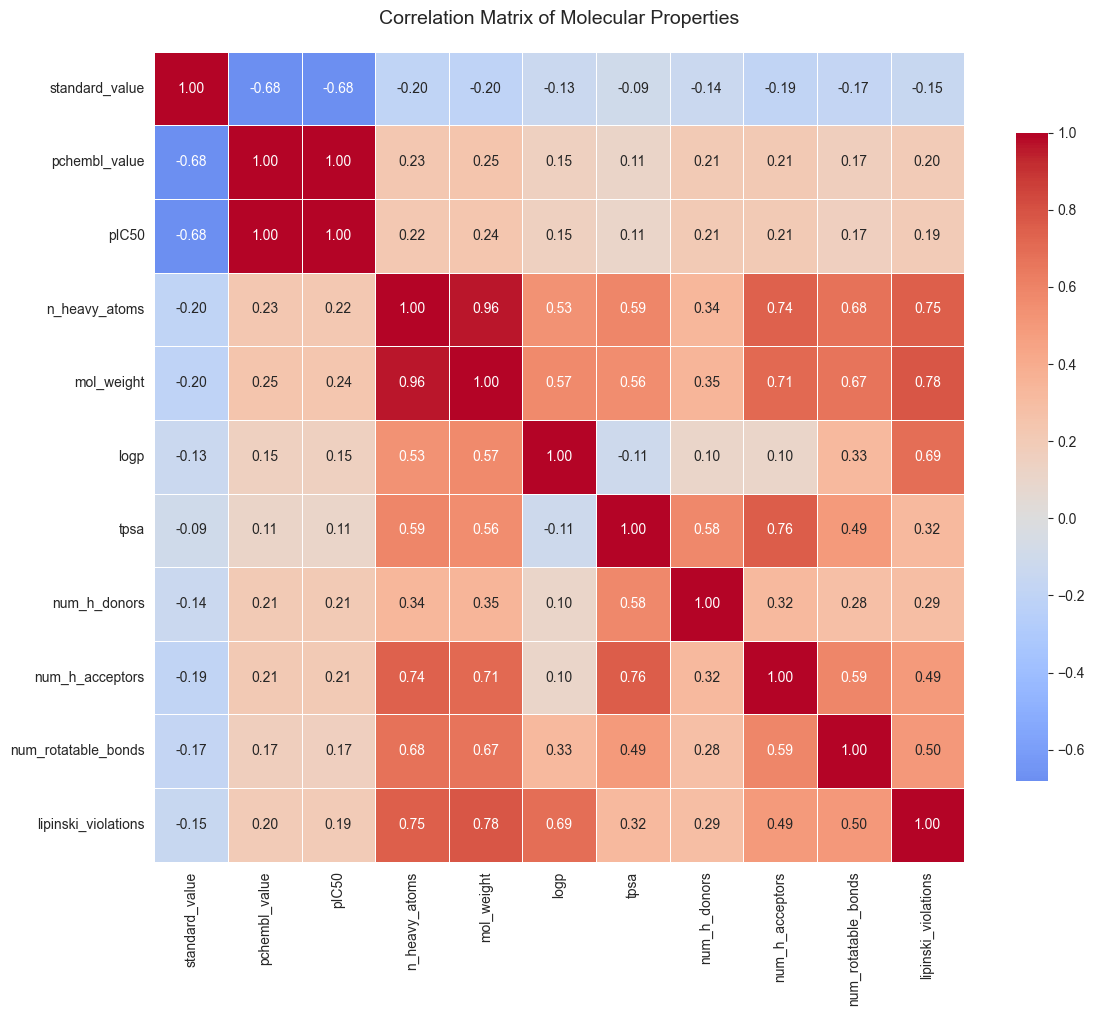


Correlations with pIC50:
pchembl_value          1.000000
pIC50                  1.000000
mol_weight             0.242649
n_heavy_atoms          0.223312
num_h_acceptors        0.208302
num_h_donors           0.206076
lipinski_violations    0.193662
num_rotatable_bonds    0.165037
logp                   0.148091
tpsa                   0.107042
standard_value        -0.676699
Name: pIC50, dtype: float64


In [16]:
# Cell 9: Correlation Analysis
print("\n" + "="*70)
print("CORRELATION ANALYSIS")
print("="*70)

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID columns if any
numeric_cols = [col for col in numeric_cols if not col.endswith('_id')]

# Calculate correlation
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True, linewidths=0.5, 
                cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Molecular Properties', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Show correlations with pIC50
    if 'pIC50' in numeric_cols:
        print("\nCorrelations with pIC50:")
        pic50_corr = corr_matrix['pIC50'].sort_values(ascending=False)
        print(pic50_corr)



Generating pairplot (this may take a moment)...


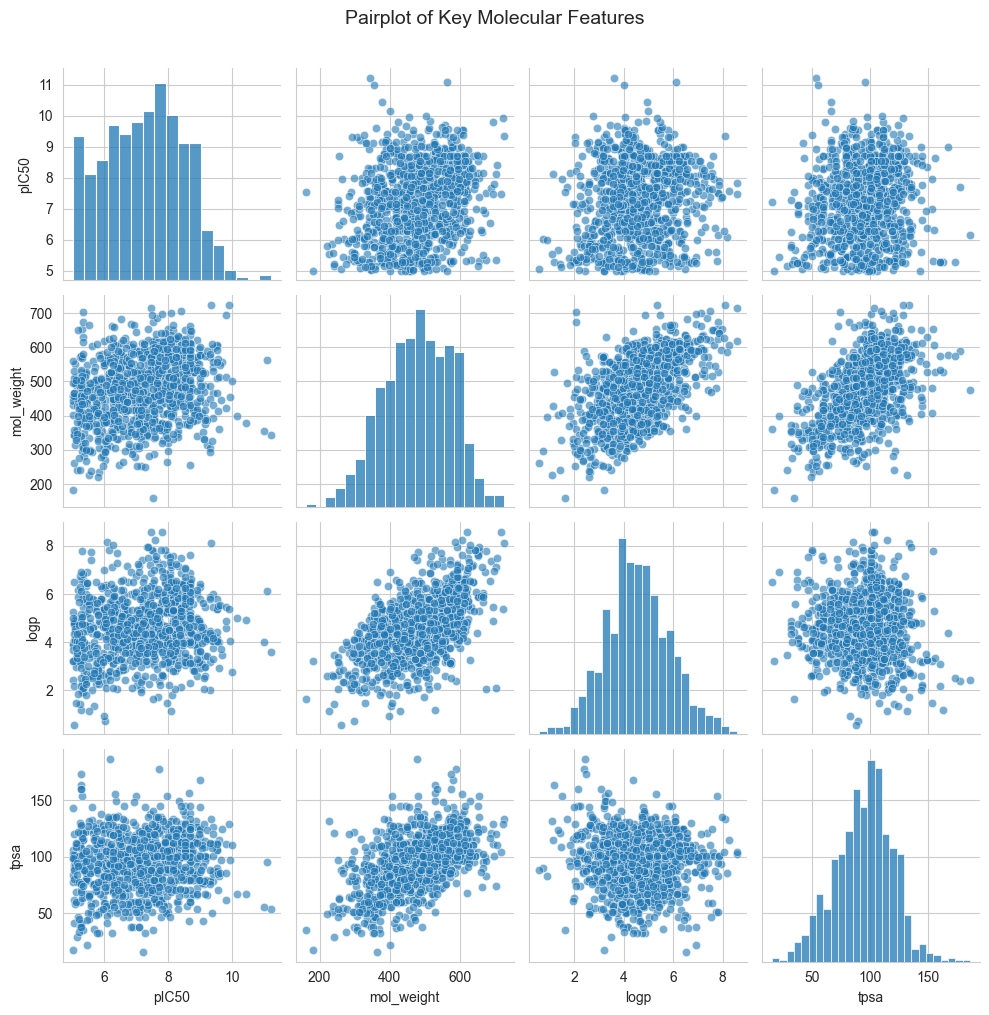

In [17]:
# Cell 10: Pairplot for Key Features
if len(numeric_cols) >= 3:
    print("\nGenerating pairplot (this may take a moment)...")
    
    # Select key features
    key_features = ['pIC50', 'mol_weight', 'logp', 'tpsa']
    key_features = [f for f in key_features if f in df.columns]
    
    if len(key_features) >= 2:
        # Sample data if too large
        sample_df = df[key_features].sample(min(1000, len(df)), random_state=42)
        
        sns.pairplot(sample_df, diag_kind='hist', plot_kws={'alpha': 0.6})
        plt.suptitle('Pairplot of Key Molecular Features', y=1.01, fontsize=14)
        plt.tight_layout()
        plt.show()


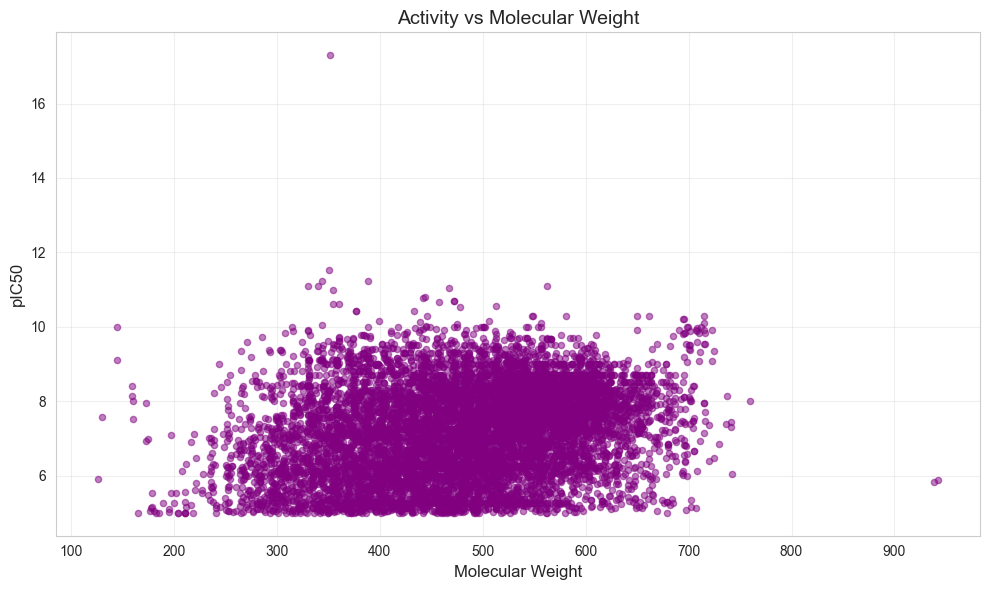


Correlation between MW and pIC50: 0.243


In [19]:
# Cell 11: Activity vs Molecular Weight
if 'mol_weight' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['mol_weight'], df['pIC50'], alpha=0.5, s=20, color='purple')
    plt.xlabel('Molecular Weight', fontsize=12)
    plt.ylabel('pIC50', fontsize=12)
    plt.title('Activity vs Molecular Weight', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    corr = df[['mol_weight', 'pIC50']].corr().iloc[0, 1]
    print(f"\nCorrelation between MW and pIC50: {corr:.3f}")

In [20]:
# Cell 12: Summary Report
print("\n" + "="*70)
print("DATA EXPLORATION SUMMARY")
print("="*70)

summary = {
    'Total compounds': f"{len(df):,}",
    'Features': len(df.columns),
    'pIC50 range': f"{df['pIC50'].min():.2f} - {df['pIC50'].max():.2f}",
    'Mean pIC50': f"{df['pIC50'].mean():.2f} ± {df['pIC50'].std():.2f}",
    'Missing values': 'None' if df.isnull().sum().sum() == 0 else df.isnull().sum().sum()
}

if 'lipinski_violations' in df.columns:
    drug_like = (df['lipinski_violations'] <= 1).sum()
    summary['Drug-like compounds'] = f"{drug_like:,} ({drug_like/len(df)*100:.1f}%)"

for key, value in summary.items():
    print(f"{key:.<40} {value}")

print("\n✓ Data Exploration Complete!")
print("\n📝 Next Steps:")
print("  1. Feature engineering")
print("  2. Train models: python scripts/train_classical.py")
print("="*70)


DATA EXPLORATION SUMMARY
Total compounds......................... 9,224
Features................................ 17
pIC50 range............................. 5.00 - 17.30
Mean pIC50.............................. 7.20 ± 1.22
Missing values.......................... 11
Drug-like compounds..................... 6,657 (72.2%)

✓ Data Exploration Complete!

📝 Next Steps:
  1. Feature engineering
  2. Train models: python scripts/train_classical.py
